In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DK_NFL_contest_data_2018_clean.csv")
df.head()

,Name,Link,Prize Pool,Buy In,Top Prize,Max Entries,Entries,Cash Line,Winner,Winning Score,Week
0,NFL $5M Roman Fantasy Football Millionaire [$1...,Contest,5000000.0,20.0,1000000,150,281924,180.34,chalk,301.18,Week 1
1,NFL $1.5M Wildcat [$250K to 1st],Contest,1500000.0,333.0,250000,150,5005,188.76,fjbourne,271.78,Week 1
2,NFL $600K Luxury Box [$150K to 1st],Contest,600000.0,2120.0,150000,9,300,204.46,BrandonAdams,257.70,Week 1
3,NFL $500K Week 1 Heavy Hitter [$200K to 1st],Contest,500000.0,26200.0,200000,1,19,223.86,dandydon,250.68,Week 1
4,NFL $500K Slant [$50K to 1st],Contest,500000.0,9.0,50000,150,65359,186.88,soapmeas,281.16,Week 1


# General contest

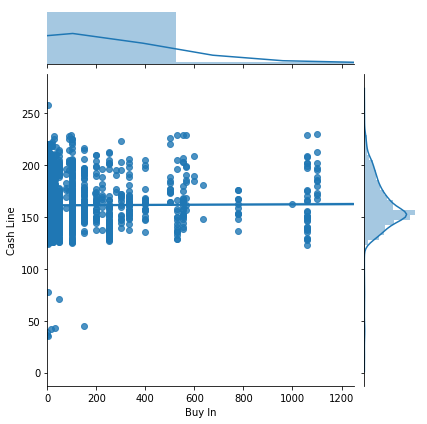

In [3]:
sns.jointplot(x="Buy In", y="Cash Line", data=df, xlim=(0,1250), kind="reg")

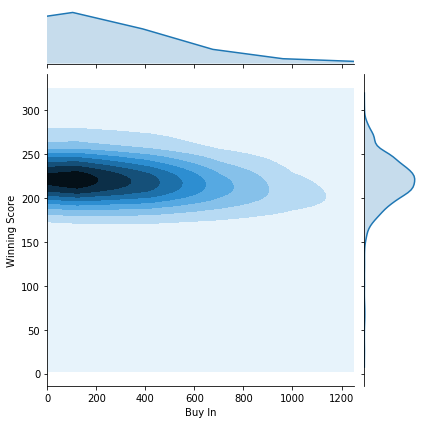

In [4]:
sns.jointplot(x="Buy In", y="Winning Score", data=df, xlim=(0,1250), kind="kde")

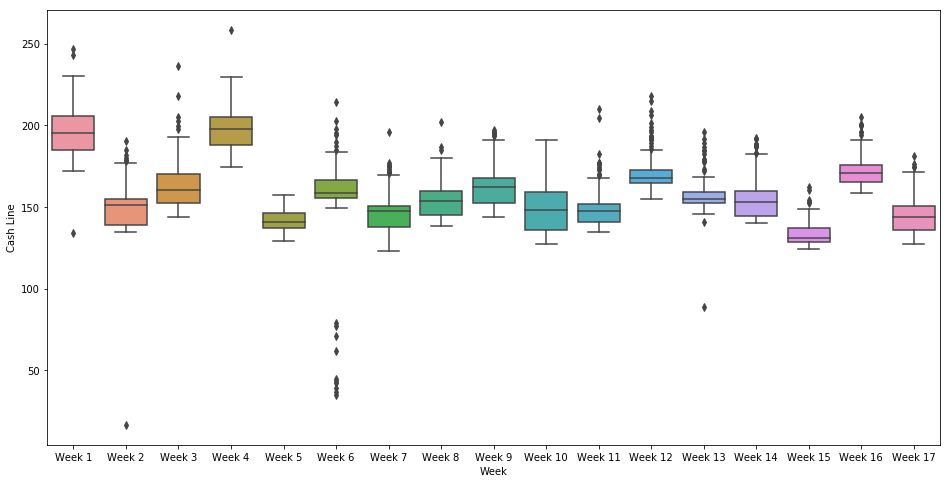

In [5]:
fig, axis = plt.pyplot.subplots()
fig.set_size_inches(16,8)

sns.boxplot(x="Week", y="Cash Line", data=df, ax = axis)

# Multiplier contests
For a contest with a multiplier-styled payout structure, suppose that $m$ is the multiplier, $b$ is buy-in cost, $n$ is number of contests participated in, and $k$ is winrate. Then to earn profit, one needs to have $nb<(mb-b)\cdot k$, so that $k > \dfrac{n}{m-1}$. Therefore we want to build lineups that fall within the top $(1-k)$-th fraction of double-up contest cash lines.

### Double-up

In [6]:
doubleUp = df[df["Name"].apply(lambda x: "double" in x.lower())]
doubleUp.head()

,Name,Link,Prize Pool,Buy In,Top Prize,Max Entries,Entries,Cash Line,Winner,Winning Score,Week
6,NFL MASSIVE $25 Double Up,Contest,400000.0,25.0,50,150,16950,204.82,youdacao,283.48,Week 1
8,NFL MASSIVE $5 Double Up,Contest,150000.0,5.0,10,150,34482,203.02,youdacao,283.48,Week 1
12,$10M Fantasy Football World Championship Doubl...,Contest,129222.2,500.0,1000,9,270,225.86,rayofhope,254.26,Week 1
16,NFL MASSIVE $25 Double Up [Single Entry],Contest,100000.0,25.0,50,1,4597,186.76,PetrGibbons,272.18,Week 1
17,NFL MASSIVE $5 Double Up,Contest,100000.0,5.0,10,150,22988,206.42,youdacao,283.48,Week 1


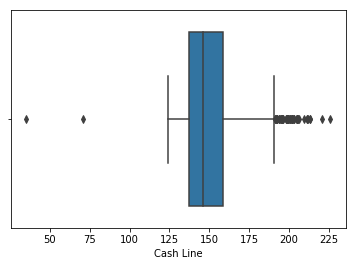

In [7]:
sns.boxplot(x=doubleUp["Cash Line"])

In [11]:
doubleUp["Cash Line"].describe()

count    555.000000
mean     152.279279
std       22.381722
min       35.000000
25%      137.250000
50%      146.100000
75%      158.570000
max      225.860000
Name: Cash Line, dtype: float64

Because there are nine players to a DraftKings lineup, the average player on a winning lineup should fall somewhere within the following:

In [12]:
(doubleUp["Cash Line"]/9).describe()

count    555.000000
mean      16.919920
std        2.486858
min        3.888889
25%       15.250000
50%       16.233333
75%       17.618889
max       25.095556
Name: Cash Line, dtype: float64

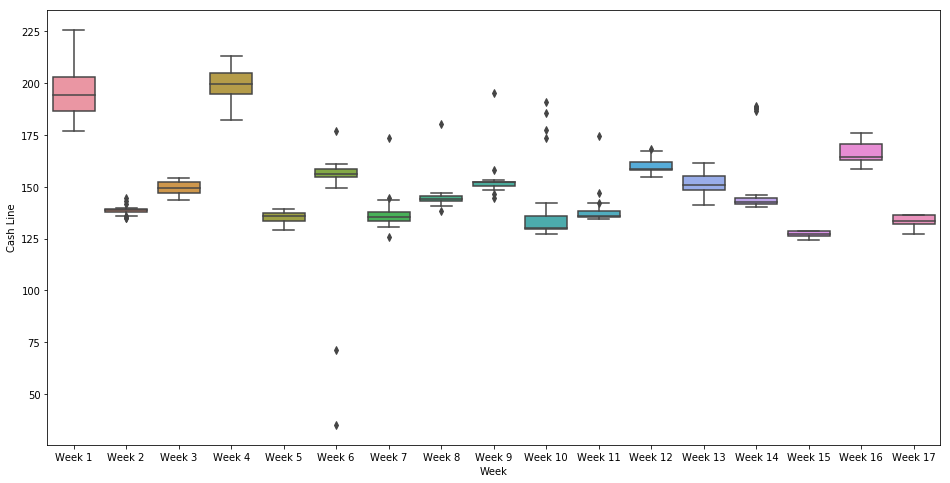

In [9]:
fig, axis = plt.pyplot.subplots()
fig.set_size_inches(16,8)

sns.boxplot(x="Week", y="Cash Line", data=doubleUp, ax = axis)